# 밑바닥 5장

## 5.4.1 mul layer

In [1]:
class Mullayer:
    def __init__(self):
        self.x = None
        self.y = None
    
    def forward(self, x, y):
        self.x = x
        self.y = y
        out = x * y
        
        return out
    
    def backward(self, dout):
        dx = dout * self.y
        dy = dout * self.x
        
        return dx, dy
    
        


In [2]:
apple = 100.0
apple_num = 2.0
tax = 1.1

#layers
mul_apple_layer = Mullayer()
mul_tax_layer = Mullayer()

#forward
apple_price = mul_apple_layer.forward(apple, apple_num)
price = mul_tax_layer.forward(apple_price, tax)

print(price)

220.00000000000003


In [3]:
dprice = 1
dapple_price, dtax = mul_apple_layer.backward(dprice)
dapple, dapple_num = mul_tax_layer.backward(dapple_price)

print(dapple, dapple_num, dtax)

2.2 400.0 100.0


## 5.4.2 add layer

In [4]:
class Addlayer:
    def __init__(self):
        pass
        
    def forward(self, x, y):
        out = x + y    
        return out
    
    def backward(self, dout):
        dx = dout * 1
        dy = dout * 1
        return dx, dy

## ex

In [9]:
apple = 100
apple_num = 2
orange = 150
orange_num = 3
tax = 1.1

# layers
mul_apple_layer = Mullayer()
mul_orange_layer = Mullayer()
add_apple_orange_layer = Addlayer()
mul_tax_layer = Mullayer()

# forward
apple_price = mul_apple_layer.forward(apple, apple_num)
orange_price = mul_orange_layer.forward(orange, orange_num)
all_price = add_apple_orange_layer.forward(apple_price, orange_price)
price = mul_tax_layer.forward(all_price, tax)

# backward
dprice = 1
dall_price, dtax = mul_tax_layer.backward(dprice)



dapple_price, dorange_price = add_apple_orange_layer.backward(dall_price)


(dapple, dapple_num) = mul_apple_layer.backward(dapple_price)
(dorage, dorange_num) = mul_orange_layer.backward(dorange_price)


print(price)
print(dapple, dapple_num, dorage, dorange_num)


715.0000000000001
2.2 110.00000000000001 3.3000000000000003 165.0


## impl activation func layers



### Relu layer

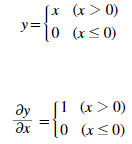



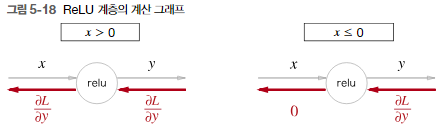

In [6]:
class Relu:
    def __init__(self):
        self.mask = None
        
    def forward(self, x):
        self.mask = (x <= 0)
        out = x.copy()
        out[self.mask] = 0
        
        return out
    
    def backward(self, dout):
        dout[self.mask] = 0
        dx = dout
        return dx
        

In [7]:
import numpy as np

x = np.array(
    [
        [1.0, -0.5],
        [-2.0, 3.0]
    ]
)

print(x)
mask = (x<=0)
print(mask)

[[ 1.  -0.5]
 [-2.   3. ]]
[[False  True]
 [ True False]]


### Sigmoid layer



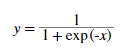

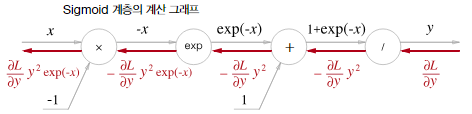

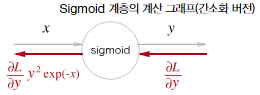

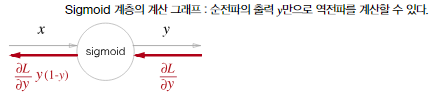

In [8]:
class Sigmoid:
    def __init__(self):
        self.out = None
        
    def forward(self, x):
        out = 1 / (1 + np.exp(-x))
        self.out = out
        
        return out
    
    def backward(self, dout):
        dx = dout * (1.0 - self.out) * self.out
        
        return dx        

### Affine

In [9]:
X = np.random.rand(2)
W = np.random.rand(2,3)
B = np.random.rand(3)

print(X.shape)
print(W.shape)
print(B.shape)

Y = np.dot(X,W) + B
print(Y)

W

(2,)
(2, 3)
(3,)
[1.32161898 1.87446453 0.46490899]


array([[0.4659791 , 0.79347549, 0.21005884],
       [0.83081009, 0.74923439, 0.13410849]])

### NN

In [11]:
import sys, os
sys.path.append(os.pardir)
import numpy as np
from common.layers import *
from common.gradient import numerical_gradient
from collections import OrderedDict

class TwoLayerNet:
    
    def __init__(self, input_size, hidden_size, output_size, weight_init_std=0.01):
        #init weight
        self.params = {}
        self.params['W1'] = weight_init_std * np.random.randn(input_size, hidden_size)
        self.params['b1'] = np.zeros(hidden_size)

..


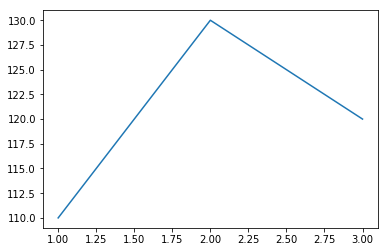

In [3]:
%matplotlib inline
from matplotlib import pyplot as plt

plt.plot([1,2,3], [110,130,120])
plt.show()

a=1

In [101]:
import numpy as np
x = np.random.randn(2,4)
print(x)
xT = x.reshape(x.shape[0], -1)
print(xT)
print("shpae:")
print(x.shape)

W = np.random.randn(4, 3) * 0.01
b = np.random.randn(3)

print("h_shape:")
print(W.shape)

print("result:")
print(np.dot(xT, W) + b)

x.ndim
np.argmax(x, axis=1)

[[ 0.58414049 -0.6483668  -0.29988747 -0.06133004]
 [-1.73550694 -0.82060985  0.12614327 -1.8281243 ]]
[[ 0.58414049 -0.6483668  -0.29988747 -0.06133004]
 [-1.73550694 -0.82060985  0.12614327 -1.8281243 ]]
shpae:
(2, 4)
h_shape:
(4, 3)
result:
[[ 0.76429268 -0.313521    0.01623758]
 [ 0.75922699 -0.2915085  -0.01699061]]


array([0, 2])

array([[2.18387094, 0.69242566, 0.2686791 ]])